In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from bs4 import BeautifulSoup

# get market info for bitcoin from the start of 2013 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-04-30,9426.11,9477.14,9166.81,9240.55,8673920000,160302000000
1,2018-04-29,9346.41,9531.49,9193.71,9419.08,8853000000,158928000000
2,2018-04-28,8939.27,9412.09,8931.99,9348.48,7805480000,151991000000
3,2018-04-27,9290.63,9375.47,8987.05,8987.05,7566290000,157948000000
4,2018-04-26,8867.32,9281.51,8727.09,9281.51,8970560000,150736000000


In [2]:
# get market info for ethereum from the start of 2013 to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# look at the first few rows
eth_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-04-30,689.76,694.44,666.12,669.92,2853100000,68376400000
1,2018-04-29,683.91,697.76,670.51,688.88,2740560000,67782400000
2,2018-04-28,644.65,691.44,644.65,683.68,2496660000,63877700000
3,2018-04-27,662.11,684.87,647.03,647.03,2598130000,65594600000
4,2018-04-26,618.08,663.18,604.01,662.81,2984010000,61219700000


In [3]:
# get market info for rpl from the start of 2013 to the current day
rpl_market_info = pd.read_html("https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
rpl_market_info = rpl_market_info.assign(Date=pd.to_datetime(rpl_market_info['Date']))
# when Volume is equal to '-' convert it to 0
rpl_market_info.loc[rpl_market_info['Volume']=="-",'Volume']=0
# convert to int
rpl_market_info['Volume'] = rpl_market_info['Volume'].astype('int64')
# look at the first few rows
rpl_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-04-30,0.871404,0.876788,0.831208,0.837938,575364000,34112200000
1,2018-04-29,0.864399,0.904945,0.834480,0.872778,896314000,33837900000
2,2018-04-28,0.812063,0.887591,0.812063,0.863804,788719000,31789200000
3,2018-04-27,0.851139,0.859641,0.813885,0.813885,673793000,33318900000
4,2018-04-26,0.801774,0.852414,0.771787,0.852414,1028590000,31386400000


In [6]:
# getting the Bitcoin, Eth and Ripple logos
import sys
    
from PIL import Image

import io
import urllib

bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
rpl_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Ripple_logo.svg/640px-Ripple_logo.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)

image_file = io.BytesIO(rpl_img.read())
rpl_im = Image.open(image_file)

width_eth_im , height_eth_im  = eth_im.size


In [7]:
bitcoin_im = bitcoin_im.resize((int(bitcoin_im.size[0]*0.6), int(bitcoin_im.size[1]*0.6)), Image.ANTIALIAS)
eth_im = eth_im.resize((int(eth_im.size[0]*0.6), int(eth_im.size[1]*0.6)), Image.ANTIALIAS)
rpl_im = rpl_im.resize((int(rpl_im.size[0]*0.4), int(rpl_im.size[1]*0.4)), Image.ANTIALIAS)

In [8]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]
rpl_market_info.columns =[rpl_market_info.columns[0]]+['rpl_'+i for i in rpl_market_info.columns[1:]]

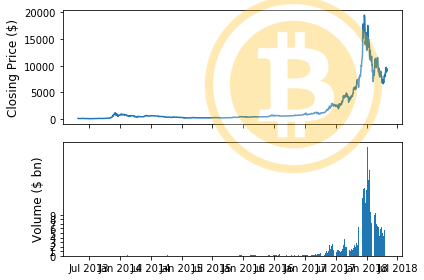

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 3]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
fig.figimage(bitcoin_im, 100, 50, zorder=1,alpha=.3)
plt.show()

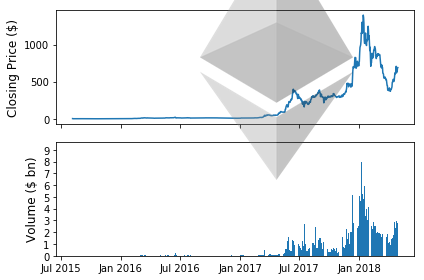

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1,1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im,200,100, zorder=1, alpha=.3)
plt.show()

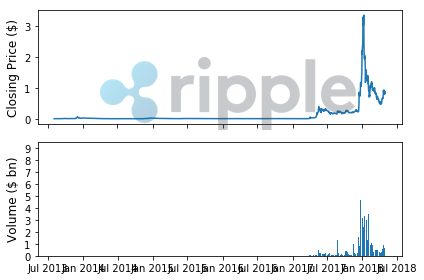

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1,1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(rpl_market_info['Date'].astype(datetime.datetime),rpl_market_info['rpl_Open'])
ax2.bar(rpl_market_info['Date'].astype(datetime.datetime).values, rpl_market_info['rpl_Volume'].values)
fig.tight_layout()
fig.figimage(rpl_im,100,150, zorder=1, alpha=.3)
plt.show()

In [12]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = pd.merge(market_info,rpl_market_info, on=['Date'])

market_info = market_info[market_info['Date']>='2016-01-01']
for coins in ['bt_', 'rpl_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,...,eth_Market Cap,rpl_Open,rpl_High,rpl_Low,rpl_Close,rpl_Volume,rpl_Market Cap,bt_day_diff,rpl_day_diff,eth_day_diff
0,2018-04-30,9426.11,9477.14,9166.81,9240.55,8673920000,160302000000,689.76,694.44,666.12,...,68376400000,0.871404,0.876788,0.831208,0.837938,575364000,34112200000,-0.019686,-0.038405,-0.028764
1,2018-04-29,9346.41,9531.49,9193.71,9419.08,8853000000,158928000000,683.91,697.76,670.51,...,67782400000,0.864399,0.904945,0.834480,0.872778,896314000,33837900000,0.007775,0.009693,0.007267
2,2018-04-28,8939.27,9412.09,8931.99,9348.48,7805480000,151991000000,644.65,691.44,644.65,...,63877700000,0.812063,0.887591,0.812063,0.863804,788719000,31789200000,0.045777,0.063715,0.060544
3,2018-04-27,9290.63,9375.47,8987.05,8987.05,7566290000,157948000000,662.11,684.87,647.03,...,65594600000,0.851139,0.859641,0.813885,0.813885,673793000,33318900000,-0.032676,-0.043770,-0.022776
4,2018-04-26,8867.32,9281.51,8727.09,9281.51,8970560000,150736000000,618.08,663.18,604.01,...,61219700000,0.801774,0.852414,0.771787,0.852414,1028590000,31386400000,0.046710,0.063160,0.072369


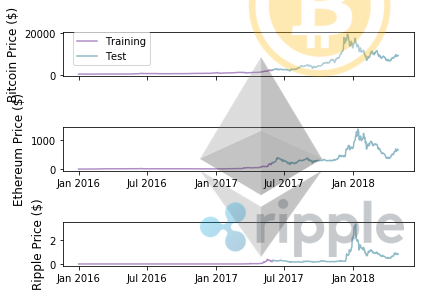

In [13]:
split_date = '2017-06-01'
fig, (ax1, ax2,ax3) = plt.subplots(3,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax3.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax3.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')

ax2.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')

ax3.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['rpl_Close'], color='#B08FC7')
ax3.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['rpl_Close'], color='#8FBAC8')

ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax3.set_ylabel('Ripple Price ($)',fontsize=12)

plt.tight_layout()

ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 10})

fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.8), int(bitcoin_im.size[1]*0.8)), Image.ANTIALIAS), 
             165, 175, zorder=3,alpha=.3)
fig.figimage(eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS), 
             200, 40, zorder=3,alpha=.3)
fig.figimage(rpl_im.resize((int(rpl_im.size[0]*0.8), int(rpl_im.size[1]*0.8)), Image.ANTIALIAS), 
             200, 40, zorder=3,alpha=.3)
plt.show()

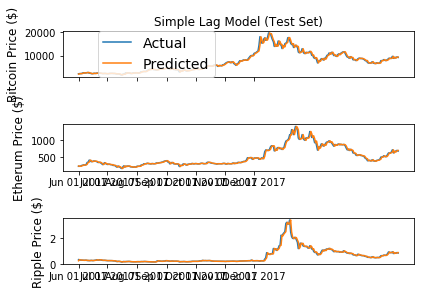

In [14]:
# trivial lag model: P_t = P_(t-1)
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')

ax3.set_ylabel('Ripple Price ($)',fontsize=12)
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['rpl_Close'].values, label='Actual')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['rpl_Close'][1:].values, label='Predicted')

fig.tight_layout()
plt.show()

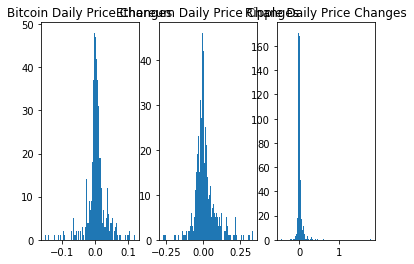

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.hist(market_info[market_info['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax3.hist(market_info[market_info['Date']< split_date]['rpl_day_diff'].values, bins=100)

ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
ax3.set_title('Ripple Daily Price Changes')

plt.show()

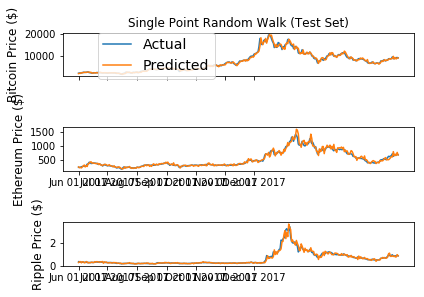

In [16]:
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

rpl_r_walk_mean, rpl_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['rpl_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['rpl_day_diff'].values)
rpl_random_steps = np.random.normal(rpl_r_walk_mean, rpl_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)				

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['rpl_Close'].values, label='Actual')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['rpl_Close'].values[1:] * 
     (1+rpl_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax3.set_ylabel('Ripple Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

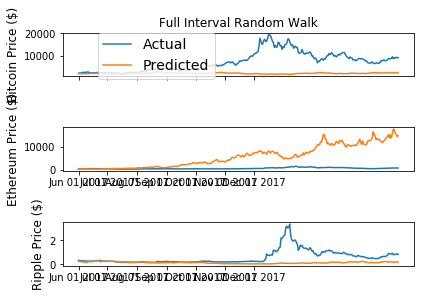

In [17]:
bt_random_walk = []
eth_random_walk = []
rpl_random_walk = []
for n_step, (bt_step, eth_step, rpl_step) in enumerate(zip(bt_random_steps, eth_random_steps, rpl_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
        rpl_random_walk.append(market_info[market_info['Date']< split_date]['rpl_Close'].values[0] * (rpl_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
        rpl_random_walk.append(rpl_random_walk[n_step-1] * (rpl_step+1))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         eth_random_walk[::-1], label='Predicted')

ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['rpl_Close'].values, label='Actual')
ax3.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         rpl_random_walk[::-1], label='Predicted')


ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax3.set_ylabel('Ripple Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Ethereum Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

interactive(children=(IntSlider(value=205, description='Random Seed:', max=210, min=200), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func>

In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(rpl_r_walk_mean, rpl_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_info[market_info['Date']< split_date]['rpl_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['rpl_Close'].values, label='Actual')
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['rpl_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['rpl_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Ripple Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

interactive(children=(IntSlider(value=205, description='Random Seed:', max=210, min=200), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func>

# Long Short Term Memory (LSTM)

In [20]:
for coins in ['bt_',  'rpl_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 3*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)

In [21]:

model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_','rpl_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility,rpl_Close,rpl_Volume,rpl_close_off_high,rpl_volatility
850,2016-01-01,434.33,36278900,-0.340961,0.020292,0.948024,206062,-0.127716,0.025040,0.005955,211767,1.405405,0.018377
849,2016-01-02,433.44,30096600,0.875895,0.009641,0.937124,255504,1.948847,0.034913,0.006065,278539,-0.712329,0.024509
848,2016-01-03,430.01,39633800,0.239203,0.020827,0.971905,407632,0.023173,0.060792,0.006017,291723,0.939024,0.013518
847,2016-01-04,433.09,38477500,-0.211397,0.012649,0.954480,346245,0.413514,0.047943,0.005958,310820,1.858491,0.017611
846,2016-01-05,431.96,34522600,0.480000,0.010391,0.950176,219833,1.546894,0.025236,0.006044,381554,-1.000000,0.015284


In [30]:
# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [31]:
window_len = 14
norm_cols = [coin+metric for coin in ['bt_', 'rpl_', 'eth_'] for metric in ['Close','Volume']]

In [32]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [33]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

In [34]:
# easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [35]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [36]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 6s - loss: 0.2447
Epoch 2/50
 - 5s - loss: 0.1575
Epoch 3/50
 - 5s - loss: 0.1367
Epoch 4/50
 - 5s - loss: 0.1193
Epoch 5/50
 - 5s - loss: 0.1121
Epoch 6/50
 - 5s - loss: 0.1057
Epoch 7/50
 - 5s - loss: 0.0969
Epoch 8/50
 - 5s - loss: 0.0977
Epoch 9/50
 - 5s - loss: 0.0942
Epoch 10/50
 - 5s - loss: 0.0942
Epoch 11/50
 - 5s - loss: 0.0901
Epoch 12/50
 - 5s - loss: 0.0862
Epoch 13/50
 - 5s - loss: 0.0845
Epoch 14/50
 - 5s - loss: 0.0835
Epoch 15/50
 - 5s - loss: 0.0847
Epoch 16/50
 - 5s - loss: 0.0846
Epoch 17/50
 - 5s - loss: 0.0854
Epoch 18/50
 - 5s - loss: 0.0823
Epoch 19/50
 - 5s - loss: 0.0871
Epoch 20/50
 - 5s - loss: 0.0778
Epoch 21/50
 - 5s - loss: 0.0801
Epoch 22/50
 - 5s - loss: 0.0799
Epoch 23/50
 - 5s - loss: 0.0760
Epoch 24/50
 - 5s - loss: 0.0777
Epoch 25/50
 - 5s - loss: 0.0782
Epoch 26/50
 - 5s - loss: 0.0804
Epoch 27/50
 - 5s - loss: 0.0733
Epoch 28/50
 - 5s - loss: 0.0725
Epoch 29/50
 - 5s - loss: 0.0737
Epoch 30/50
 - 5s - loss: 0.0739
Epoch 31/50
 - 5s -

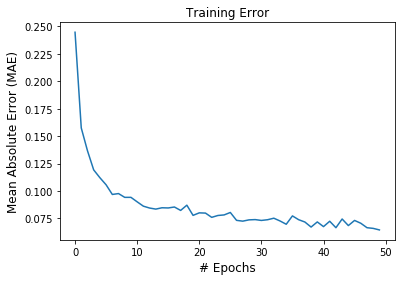

In [37]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

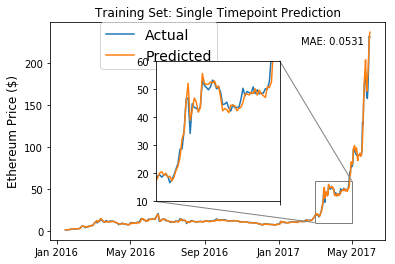

In [38]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([10,60])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

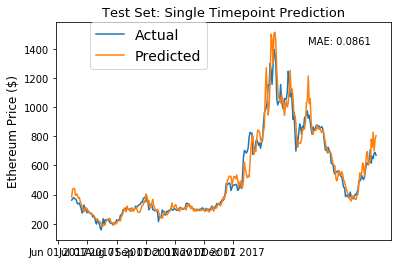

In [39]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [40]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 7s - loss: 0.1613
Epoch 2/50
 - 5s - loss: 0.1056
Epoch 3/50
 - 5s - loss: 0.0709
Epoch 4/50
 - 5s - loss: 0.0608
Epoch 5/50
 - 5s - loss: 0.0509
Epoch 6/50
 - 5s - loss: 0.0490
Epoch 7/50
 - 5s - loss: 0.0425
Epoch 8/50
 - 5s - loss: 0.0395
Epoch 9/50
 - 5s - loss: 0.0391
Epoch 10/50
 - 5s - loss: 0.0363
Epoch 11/50
 - 5s - loss: 0.0369
Epoch 12/50
 - 5s - loss: 0.0346
Epoch 13/50
 - 5s - loss: 0.0316
Epoch 14/50
 - 5s - loss: 0.0308
Epoch 15/50
 - 5s - loss: 0.0327
Epoch 16/50
 - 5s - loss: 0.0316
Epoch 17/50
 - 5s - loss: 0.0295
Epoch 18/50
 - 5s - loss: 0.0297
Epoch 19/50
 - 5s - loss: 0.0314
Epoch 20/50
 - 6s - loss: 0.0282
Epoch 21/50
 - 5s - loss: 0.0282
Epoch 22/50
 - 5s - loss: 0.0283
Epoch 23/50
 - 5s - loss: 0.0280
Epoch 24/50
 - 5s - loss: 0.0280
Epoch 25/50
 - 5s - loss: 0.0287
Epoch 26/50
 - 6s - loss: 0.0288
Epoch 27/50
 - 5s - loss: 0.0275
Epoch 28/50
 - 5s - loss: 0.0270
Epoch 29/50
 - 5s - loss: 0.0272
Epoch 30/50
 - 5s - loss: 0.0279
Epoch 31/50
 - 5s -

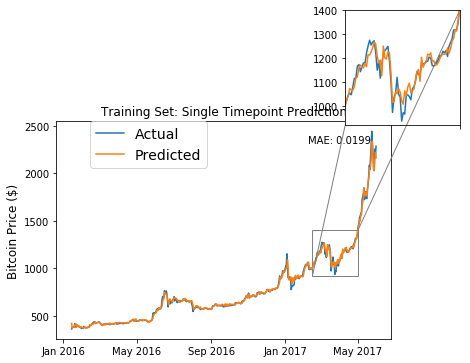

In [41]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_Close'].values[window_len:])/(training_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
axins.set_ylim([920, 1400])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

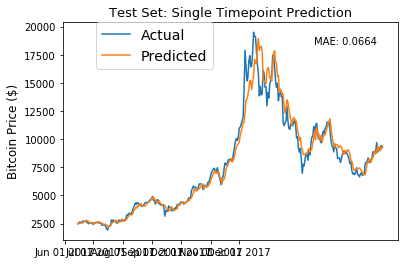

In [42]:

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][14:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][14:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close'].values[window_len:])/(test_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()


In [43]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
rpl_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
rpl_history = rpl_model.fit(LSTM_training_inputs, 
                            (training_set['rpl_Close'][window_len:].values/training_set['rpl_Close'][:-window_len].values)-1, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 7s - loss: 0.3294
Epoch 2/50
 - 5s - loss: 0.2308
Epoch 3/50
 - 5s - loss: 0.1750
Epoch 4/50
 - 5s - loss: 0.1485
Epoch 5/50
 - 5s - loss: 0.1385
Epoch 6/50
 - 5s - loss: 0.1211
Epoch 7/50
 - 5s - loss: 0.1179
Epoch 8/50
 - 5s - loss: 0.1083
Epoch 9/50
 - 5s - loss: 0.1040
Epoch 10/50
 - 5s - loss: 0.1081
Epoch 11/50
 - 5s - loss: 0.1056
Epoch 12/50
 - 5s - loss: 0.1074
Epoch 13/50
 - 5s - loss: 0.0943
Epoch 14/50
 - 5s - loss: 0.0968
Epoch 15/50
 - 5s - loss: 0.1037
Epoch 16/50
 - 5s - loss: 0.0948
Epoch 17/50
 - 5s - loss: 0.0895
Epoch 18/50
 - 5s - loss: 0.0864
Epoch 19/50
 - 5s - loss: 0.0909
Epoch 20/50
 - 5s - loss: 0.0879
Epoch 21/50
 - 5s - loss: 0.0890
Epoch 22/50
 - 5s - loss: 0.0869
Epoch 23/50
 - 5s - loss: 0.0900
Epoch 24/50
 - 5s - loss: 0.0848
Epoch 25/50
 - 5s - loss: 0.0940
Epoch 26/50
 - 5s - loss: 0.0872
Epoch 27/50
 - 5s - loss: 0.0922
Epoch 28/50
 - 5s - loss: 0.0931
Epoch 29/50
 - 5s - loss: 0.0851
Epoch 30/50
 - 5s - loss: 0.0847
Epoch 31/50
 - 5s -

C:\Users\gupta\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1, top=1
  'bottom=%s, top=%s') % (bottom, top))


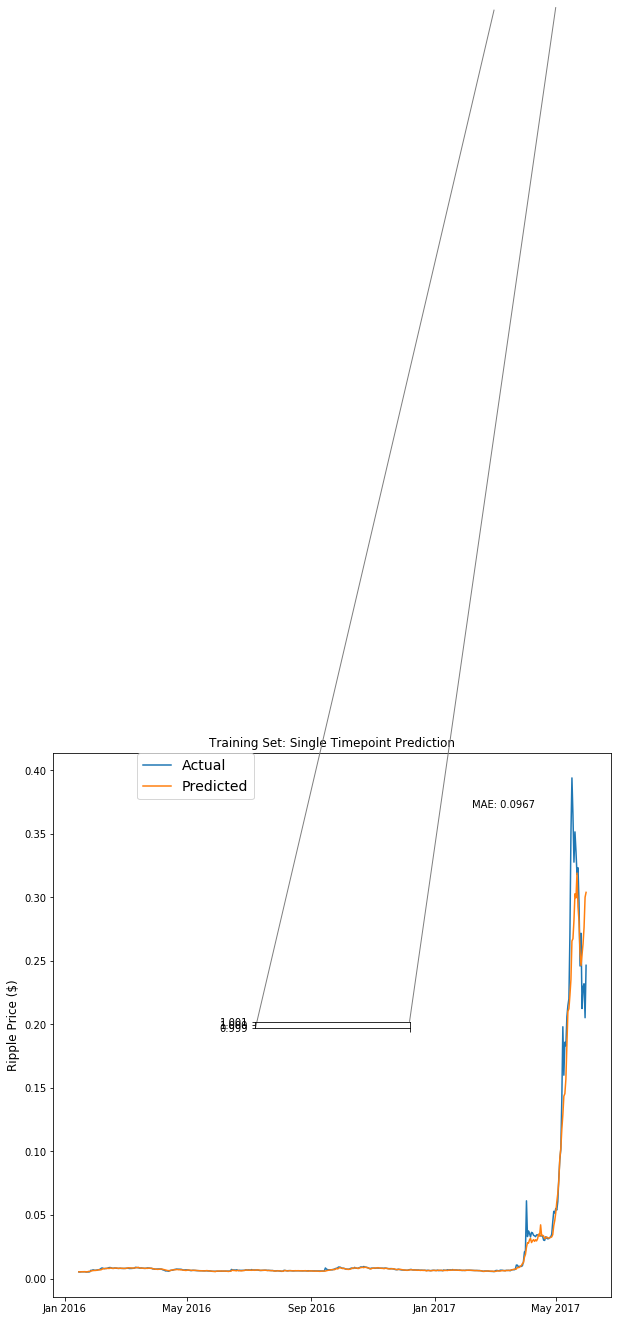

In [63]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['rpl_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(rpl_model.predict(LSTM_training_inputs))+1) * training_set['rpl_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ripple Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(rpl_model.predict(LSTM_training_inputs))+1)-\
            (training_set['rpl_Close'].values[window_len:])/(training_set['rpl_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.5, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['rpl_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(rpl_model.predict(LSTM_training_inputs))+1) * training_set['rpl_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([1,1])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

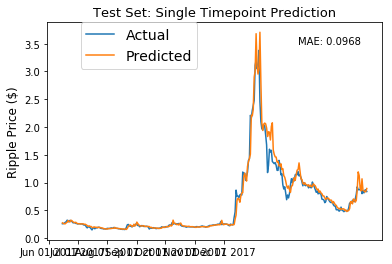

In [45]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][14:].astype(datetime.datetime),
         test_set['rpl_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][14:].astype(datetime.datetime),
         ((np.transpose(rpl_model.predict(LSTM_test_inputs))+1) * test_set['rpl_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(rpl_model.predict(LSTM_test_inputs))+1)-\
            (test_set['rpl_Close'].values[window_len:])/(test_set['rpl_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ripple Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [46]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['eth_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['eth_Close'][i:i+pred_range].values/
                                  training_set['eth_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 7s - loss: 0.3162
Epoch 2/50
 - 5s - loss: 0.2006
Epoch 3/50
 - 5s - loss: 0.1670
Epoch 4/50
 - 5s - loss: 0.1533
Epoch 5/50
 - 5s - loss: 0.1418
Epoch 6/50
 - 5s - loss: 0.1460
Epoch 7/50
 - 5s - loss: 0.1361
Epoch 8/50
 - 5s - loss: 0.1383
Epoch 9/50
 - 5s - loss: 0.1281
Epoch 10/50
 - 5s - loss: 0.1268
Epoch 11/50
 - 5s - loss: 0.1245
Epoch 12/50
 - 5s - loss: 0.1257
Epoch 13/50
 - 5s - loss: 0.1213
Epoch 14/50
 - 6s - loss: 0.1237
Epoch 15/50
 - 5s - loss: 0.1214
Epoch 16/50
 - 5s - loss: 0.1181
Epoch 17/50
 - 5s - loss: 0.1145
Epoch 18/50
 - 5s - loss: 0.1227
Epoch 19/50
 - 5s - loss: 0.1184
Epoch 20/50
 - 6s - loss: 0.1228
Epoch 21/50
 - 6s - loss: 0.1091
Epoch 22/50
 - 5s - loss: 0.1124
Epoch 23/50
 - 5s - loss: 0.1117
Epoch 24/50
 - 5s - loss: 0.1083
Epoch 25/50
 - 5s - loss: 0.1096
Epoch 26/50
 - 5s - loss: 0.1097
Epoch 27/50
 - 5s - loss: 0.1068
Epoch 28/50
 - 5s - loss: 0.1008
Epoch 29/50
 - 6s - loss: 0.1032
Epoch 30/50
 - 5s - loss: 0.1024
Epoch 31/50
 - 5s -

In [47]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_Close'][i:i+pred_range].values/
                                  training_set['bt_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 7s - loss: 0.1552
Epoch 2/50
 - 5s - loss: 0.0894
Epoch 3/50
 - 5s - loss: 0.0702
Epoch 4/50
 - 5s - loss: 0.0586
Epoch 5/50
 - 5s - loss: 0.0523
Epoch 6/50
 - 5s - loss: 0.0490
Epoch 7/50
 - 6s - loss: 0.0461
Epoch 8/50
 - 5s - loss: 0.0436
Epoch 9/50
 - 5s - loss: 0.0422
Epoch 10/50
 - 5s - loss: 0.0403
Epoch 11/50
 - 5s - loss: 0.0416
Epoch 12/50
 - 5s - loss: 0.0389
Epoch 13/50
 - 5s - loss: 0.0392
Epoch 14/50
 - 5s - loss: 0.0392
Epoch 15/50
 - 5s - loss: 0.0402
Epoch 16/50
 - 5s - loss: 0.0395
Epoch 17/50
 - 5s - loss: 0.0368
Epoch 18/50
 - 5s - loss: 0.0367
Epoch 19/50
 - 5s - loss: 0.0373
Epoch 20/50
 - 5s - loss: 0.0356
Epoch 21/50
 - 5s - loss: 0.0353
Epoch 22/50
 - 5s - loss: 0.0360
Epoch 23/50
 - 5s - loss: 0.0342
Epoch 24/50
 - 6s - loss: 0.0340
Epoch 25/50
 - 6s - loss: 0.0342
Epoch 26/50
 - 6s - loss: 0.0346
Epoch 27/50
 - 5s - loss: 0.0338
Epoch 28/50
 - 5s - loss: 0.0319
Epoch 29/50
 - 5s - loss: 0.0339
Epoch 30/50
 - 5s - loss: 0.0323
Epoch 31/50
 - 5s -

In [48]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
rpl_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['rpl_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['rpl_Close'][i:i+pred_range].values/
                                  training_set['rpl_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
rpl_history = rpl_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 7s - loss: 0.3900
Epoch 2/50
 - 5s - loss: 0.2830
Epoch 3/50
 - 5s - loss: 0.2203
Epoch 4/50
 - 5s - loss: 0.1986
Epoch 5/50
 - 5s - loss: 0.1827
Epoch 6/50
 - 5s - loss: 0.1682
Epoch 7/50
 - 5s - loss: 0.1635
Epoch 8/50
 - 5s - loss: 0.1570
Epoch 9/50
 - 5s - loss: 0.1415
Epoch 10/50
 - 5s - loss: 0.1475
Epoch 11/50
 - 5s - loss: 0.1397
Epoch 12/50
 - 5s - loss: 0.1388
Epoch 13/50
 - 6s - loss: 0.1345
Epoch 14/50
 - 5s - loss: 0.1312
Epoch 15/50
 - 6s - loss: 0.1373
Epoch 16/50
 - 6s - loss: 0.1278
Epoch 17/50
 - 5s - loss: 0.1331
Epoch 18/50
 - 5s - loss: 0.1262
Epoch 19/50
 - 5s - loss: 0.1260
Epoch 20/50
 - 6s - loss: 0.1268
Epoch 21/50
 - 5s - loss: 0.1158
Epoch 22/50
 - 6s - loss: 0.1189
Epoch 23/50
 - 5s - loss: 0.1195
Epoch 24/50
 - 6s - loss: 0.1186
Epoch 25/50
 - 5s - loss: 0.1242
Epoch 26/50
 - 5s - loss: 0.1116
Epoch 27/50
 - 5s - loss: 0.1158
Epoch 28/50
 - 6s - loss: 0.1186
Epoch 29/50
 - 5s - loss: 0.1186
Epoch 30/50
 - 5s - loss: 0.1134
Epoch 31/50
 - 5s -

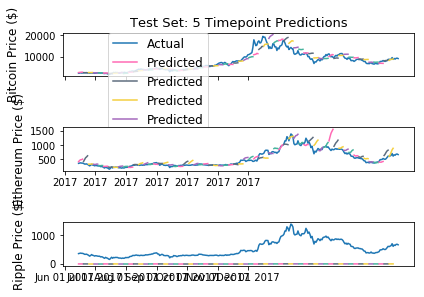

In [49]:
# little bit of reformatting the predictions to closing prices
eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['eth_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)
                                                                                                      /float(pred_range))),1))
bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['bt_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))
rpl_pred_prices = ((rpl_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['rpl_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1, ax2,ax3) = plt.subplots(3,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax3.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])

ax3.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
ax3.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
for i, (eth_pred, bt_pred, rpl_pred) in enumerate(zip(eth_pred_prices, bt_pred_prices, rpl_pred_prices)):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
    ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
             eth_pred, color=pred_colors[i%5])
    ax3.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
             rpl_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.set_xticklabels('')
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax3.set_ylabel('Ripple Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()

In [50]:
# warning: this cell may take some time to execute
# this code builds 25 LSTM models for eth and bitcoin each (with 25 different initialisations)
# the models are then saved so you hopefully only need to run this cell once

#random seed for reproducibility
#for rand_seed in range(776,800):
#     print(rand_seed)
#     np.random.seed(rand_seed)
#     temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
#     temp_model.fit(LSTM_training_inputs,
#                  (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1,
#                  epochs=50, batch_size=1, verbose=0, shuffle=True)
#     temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
#     temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
#     temp_model.fit(LSTM_training_inputs,
#                  (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1,
#                  epochs=50, batch_size=1, verbose=0, shuffle=True)
#     temp_model.save('bt_model_randseed_%d.h5'%rand_seed)
        

In [51]:
#Saving model for Ripple
#random seed for reproducibility
#for rand_seed in range(776,800):
#     print(rand_seed)
#     np.random.seed(rand_seed)
#     temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
#     temp_model.fit(LSTM_training_inputs,
#                  (training_set['rpl_Close'][window_len:].values/training_set['rpl_Close'][:-window_len].values)-1,
#                  epochs=50, batch_size=1, verbose=0, shuffle=True)
#     temp_model.save('rpl_model_randseed_%d.h5'%rand_seed)
     

In [52]:
from keras.models import load_model

eth_preds = []
bt_preds = []
rpl_preds= []
for rand_seed in range(775,800):
    temp_model = load_model('eth_model_randseed_%d.h5'%rand_seed)
    eth_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['eth_Close'].values[window_len:]/test_set['eth_Close'].values[:-window_len]-1))))
    temp_model = load_model('bt_model_randseed_%d.h5'%rand_seed)
    bt_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['bt_Close'].values[window_len:]/test_set['bt_Close'].values[:-window_len]-1))))
    temp_model = load_model('rpl_model_randseed_%d.h5'%rand_seed)
    rpl_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['rpl_Close'].values[window_len:]/test_set['rpl_Close'].values[:-window_len]-1))))

In [53]:
eth_random_walk_preds = []
bt_random_walk_preds = []
rpl_random_walk_preds = []
for rand_seed in range(775,800):
    np.random.seed(rand_seed)
    eth_random_walk_preds.append(
        np.mean(np.abs((np.random.normal(eth_r_walk_mean, eth_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['eth_Close'][window_len:])/np.array(test_set['eth_Close'][:-window_len]))))
    bt_random_walk_preds.append(
    np.mean(np.abs((np.random.normal(bt_r_walk_mean, bt_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['bt_Close'][window_len:])/np.array(test_set['bt_Close'][:-window_len]))))
    rpl_random_walk_preds.append(
    np.mean(np.abs((np.random.normal(rpl_r_walk_mean, rpl_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['rpl_Close'][window_len:])/np.array(test_set['rpl_Close'][:-window_len]))))

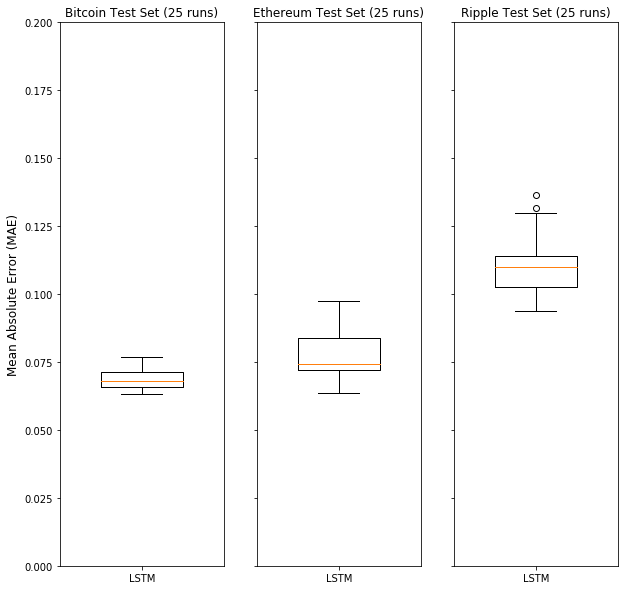

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.boxplot([bt_preds],widths=0.5)
ax1.set_ylim([0, 0.2])
ax2.boxplot([eth_preds],widths=0.5)
ax2.set_ylim([0, 0.2])
ax3.boxplot([rpl_preds],widths=0.5)
ax3.set_ylim([0, 0.2])
ax1.set_xticklabels(['LSTM'])
ax2.set_xticklabels(['LSTM'])
ax3.set_xticklabels(['LSTM'])
ax1.set_title('Bitcoin Test Set (25 runs)')
ax2.set_title('Ethereum Test Set (25 runs)')
ax3.set_title('Ripple Test Set (25 runs)')

from pylab import rcParams
plt.rcParams['figure.figsize']= 10,10


ax2.set_yticklabels('')
ax3.set_yticklabels('')

ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.show()